In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 


In [3]:
df = pd.read_csv('CC_GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Check the missing data
print(df.isnull().sum())

print("\n")
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


In [7]:
# Fill up the missing elements with mean of the MINIMUM_PAYMENTS
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the CREDIT_LIMIT
df.loc[(df['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## check for duplicates 

In [8]:
df.duplicated().sum()

0

In [9]:
# Drop Customer ID column 'CUST_ID'
df.drop('CUST_ID', axis = 1, inplace = True)

In [10]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## scale the values of all the column 

In [11]:
# Scale the data first

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [12]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## check the suitable number of clusters using elbow method

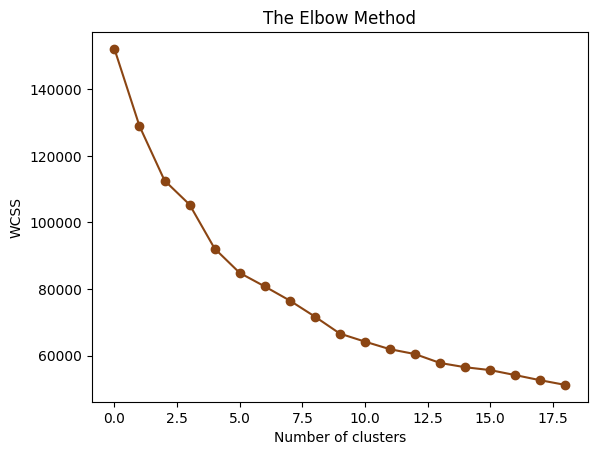

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-', marker = 'o', color = 'saddlebrown')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## We can abserve that, 4th cluster seems to be forming the elbow of the curve. However, tha values does not reduce linearly until 8th cluster. Let's choose the number of clusters to be 7 or 8.

In [14]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++' , random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=7, random_state=42)

## Labels (cluster) associated to each data point

In [15]:
labels = kmeans.labels_ 

print(kmeans.cluster_centers_.shape[0])
print(kmeans.cluster_centers_.shape[1])

7
17


In [16]:
print(kmeans.cluster_centers_)

[[ 1.61526324e+00  3.77215617e-01 -2.14652797e-01 -1.45052905e-01
  -2.41118212e-01  1.98960225e+00 -4.66260649e-01 -1.71251379e-01
  -4.34924924e-01  1.92768023e+00  1.89694913e+00 -2.68322078e-01
   9.87148873e-01  7.76926594e-01  5.21767493e-01 -3.91008812e-01
  -8.83170677e-02]
 [ 7.13885805e-01  4.64548853e-01  1.99239510e+00  1.67438422e+00
   1.63484874e+00 -2.16205887e-01  1.15722754e+00  1.73943891e+00
   1.07043161e+00 -3.19432657e-01 -2.32845244e-01  2.35210469e+00
   1.15996365e+00  1.09362214e+00  2.98937934e-01  2.56867014e-01
   3.08308795e-01]
 [-1.77452399e-01  3.85931611e-01  2.28594412e-02 -5.65223865e-02
   1.57928607e-01 -3.16316413e-01  9.12691347e-01  2.36653023e-01
   8.03469114e-01 -3.67522581e-01 -3.05361095e-01  2.14871109e-01
  -2.08235277e-01 -1.79053074e-01 -1.35440566e-03 -3.32268506e-01
   1.02362152e-01]
 [ 1.74833517e-03  3.72664938e-01 -3.65609112e-01 -2.42995752e-01
  -4.17934235e-01 -5.51448632e-02 -9.07631003e-01 -4.07690095e-01
  -8.05532242e-01  

In [17]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                         'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                         'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                                         'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.615263,0.377216,-0.214653,-0.145053,-0.241118,1.989602,-0.466261,-0.171251,-0.434925,1.927680,1.896949,-0.268322,0.987149,0.776927,0.521767,-0.391009,-0.088317
1,0.713886,0.464549,1.992395,1.674384,1.634849,-0.216206,1.157228,1.739439,1.070432,-0.319433,-0.232845,2.352105,1.159964,1.093622,0.298938,0.256867,0.308309
2,-0.177452,0.385932,0.022859,-0.056522,0.157929,-0.316316,0.912691,0.236653,0.803469,-0.367523,-0.305361,0.214871,-0.208235,-0.179053,-0.001354,-0.332269,0.102362
3,0.001748,0.372665,-0.365609,-0.242996,-0.417934,-0.055145,-0.907631,-0.407690,-0.805532,0.176814,-0.001423,-0.500117,-0.328408,-0.261537,-0.028118,-0.451648,-0.013991
4,-0.695085,-2.173522,-0.326612,-0.242052,-0.327456,-0.296768,-0.586523,-0.448942,-0.468625,-0.469555,-0.348400,-0.436376,-0.242217,-0.226855,-0.252655,0.067453,-0.171163
5,-0.694395,0.090754,0.086872,-0.041380,0.281001,-0.449883,0.897157,0.245053,0.739284,-0.641563,-0.459475,0.170240,0.048380,-0.151768,-0.294906,2.181470,-0.098696
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


## First customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money. Cluster with lowest balance, lowest cash advance, and percentage of full payment = 23%.
## Second customers cluster (Revolvers): who use credit card as a loan (most lucrative sector): highest balance and cash advance, low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%).
## Third customers cluster (VIP/Prime): high credit limit $16,000, and highest percentage of full payment, target for increase credit limit and increase spending habits.
## Fourth customers cluster (Low tenure): these are customers with low tenure (7 years), low balance.

# transform the data back to original form

In [18]:
# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                         'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                         'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                                         'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4926.508920,0.966630,544.595823,351.679258,193.027437,5151.159978,0.303218,0.151370,0.191587,0.520893,16.194111,8.040349,8086.100922,3982.270217,2080.163676,0.039351,11.399128
1,3050.367871,0.987318,5259.987675,3371.572239,1889.441077,525.477269,0.954802,0.721366,0.789854,0.071222,1.659829,73.174359,8714.871795,4899.072798,1560.868788,0.228844,11.929915
2,1195.122637,0.968694,1052.044382,498.621786,553.880524,315.540819,0.856658,0.273056,0.683757,0.061599,1.164962,20.050725,3736.804318,1214.802746,861.050157,0.056532,11.654305
3,1568.113840,0.965552,222.075330,189.114192,33.134902,863.229758,0.126074,0.080836,0.044298,0.170527,3.239115,2.278792,3299.566948,976.020845,798.678667,0.021615,11.498596
4,117.713546,0.362383,305.393725,190.680891,114.953158,356.534100,0.254951,0.068529,0.178194,0.041181,0.871255,3.863158,3613.165096,1076.419707,275.404102,0.173443,11.288259
5,119.150057,0.898769,1188.807927,523.755035,665.173195,35.446401,0.850423,0.275562,0.658248,0.006761,0.113246,18.941355,4670.474768,1293.790366,176.940202,0.791757,11.385238
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


# Now predict the data

In [19]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([3, 0, 2, ..., 2, 3, 4])

# Concatenate the clusters labels to our original dataframe

In [22]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


# now plot the clusters 

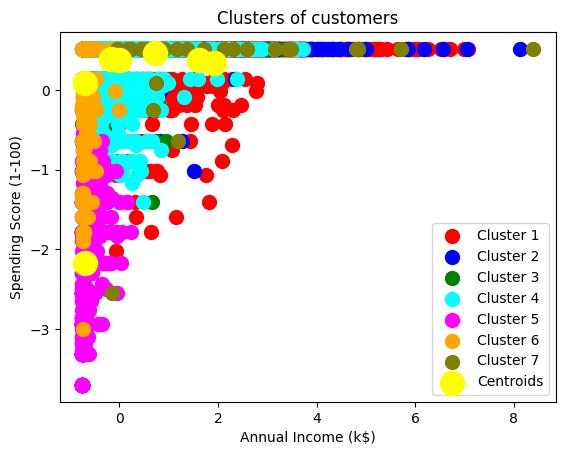

In [21]:
plt.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df_scaled[y_kmeans == 4, 0], df_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(df_scaled[y_kmeans == 5, 0], df_scaled[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(df_scaled[y_kmeans == 6, 0], df_scaled[y_kmeans == 6, 1], s = 100, c = 'olive', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# apply PCA

# Principal Component Analysis (PCA)
## PCA is an unsupervised machine learning algorithm.## PCA performs dimensionality reductions while attemting at keeping the original information unchanged.## PCA works by trying to find a new set of features called components.## Components are composites of the uncorrelated given input features.

# Obtain the principal components

In [23]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68224256, -1.07641627],
       [-1.13836334,  2.50658071],
       [ 0.96968861, -0.38352789],
       ...,
       [-0.92620204, -1.81078725],
       [-2.33657929, -0.65792017],
       [-0.55642369, -0.40046195]])

# Create a dataframe with the two components

In [25]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682243,-1.076416
1,-1.138363,2.506581
2,0.969689,-0.383528
3,-0.873606,0.043129
4,-1.599462,-0.688535
...,...,...
8945,-0.359619,-2.016160
8946,-0.564369,-1.639122
8947,-0.926202,-1.810787
8948,-2.336579,-0.657920


# Concatenate the clusters labels to the dataframe

In [26]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster' :labels})], axis = 1)

pca_df

,pca1,pca2,cluster
0,-1.682243,-1.076416,3
1,-1.138363,2.506581,0
2,0.969689,-0.383528,2
3,-0.873606,0.043129,3
4,-1.599462,-0.688535,3
...,...,...,...
8945,-0.359619,-2.016160,5
8946,-0.564369,-1.639122,2
8947,-0.926202,-1.810787,2
8948,-2.336579,-0.657920,3


# plot the data

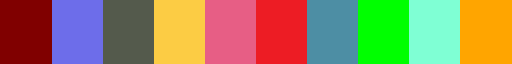

In [45]:
# Create palette
clus_clr = colors.ListedColormap(['#800000', '#6d6dea', '#545a4c', '#fccc44', '#e75e85', '#ed1c24',  
                              '#4d8ea4', '#00FF00', '#7FFFD4', '#FFA500'])
clus_clr

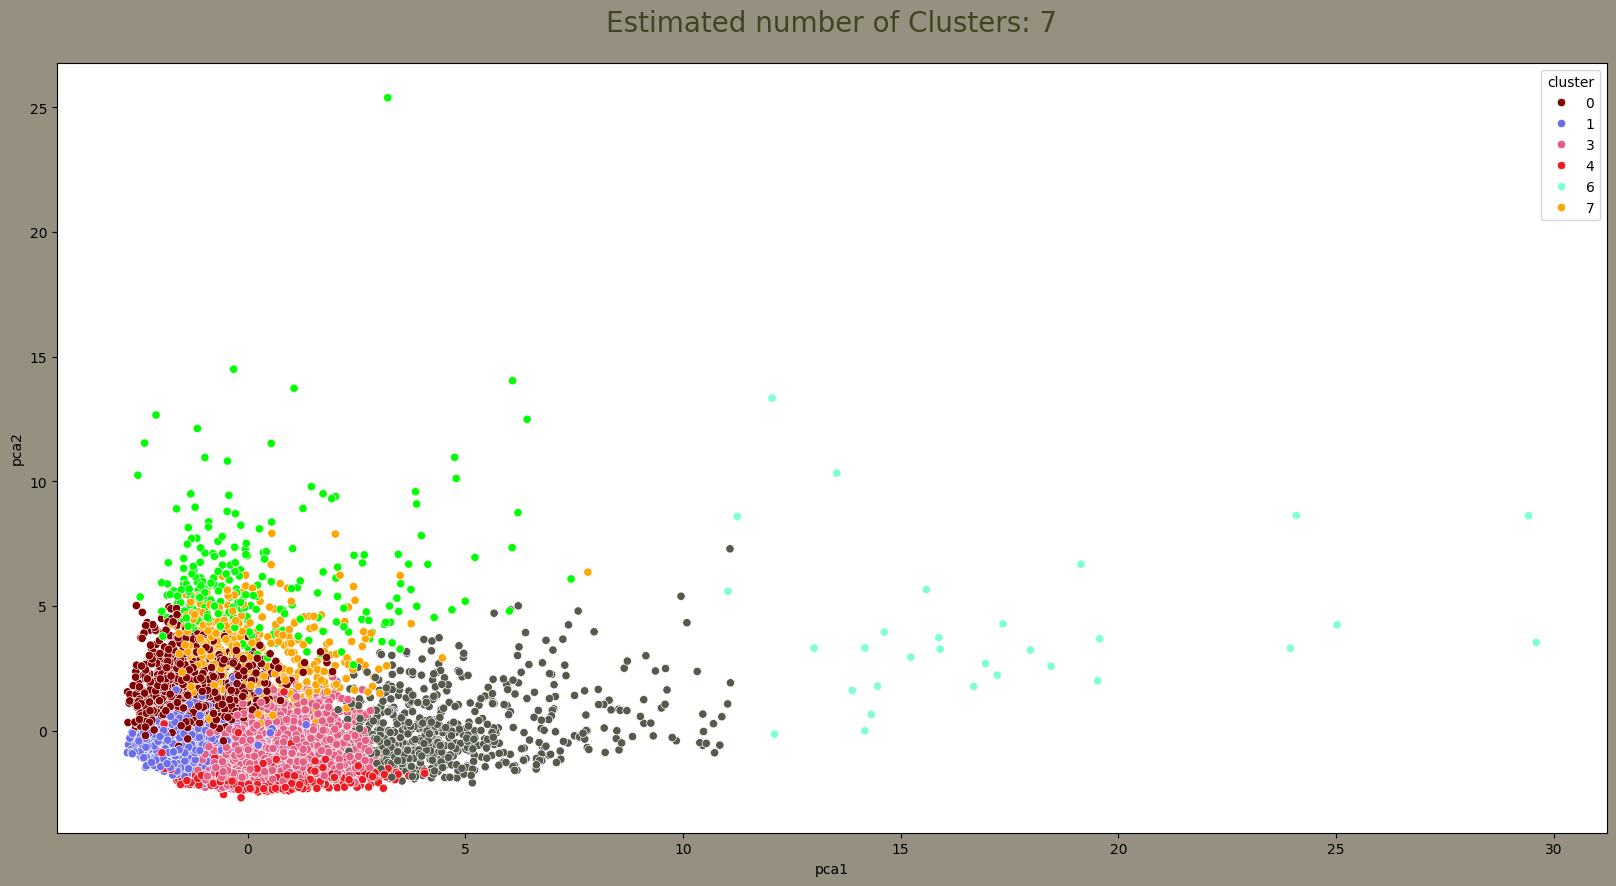

In [47]:
# Plot
plt.figure(figsize = (20,10), facecolor= '#969080')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df ,palette = clus_clr)
plt.title('Estimated number of Clusters: 7', fontsize = 20, color='#414422', y=1.03)
plt.show();

# lets try with 4 clusters

In [49]:
# Let's try the model with 4 clusters
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_ 

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])

# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])

y_kmeans = kmeans.fit_predict(df_scaled)

# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

pca_df

,pca1,pca2,cluster
0,-1.682220,-1.076448,1
1,-1.138294,2.506469,3
2,0.969682,-0.383524,0
3,-0.873622,0.043178,1
4,-1.599436,-0.688581,1
...,...,...,...
8945,-0.359630,-2.016141,0
8946,-0.564366,-1.639106,0
8947,-0.926204,-1.810780,0
8948,-2.336553,-0.657963,1


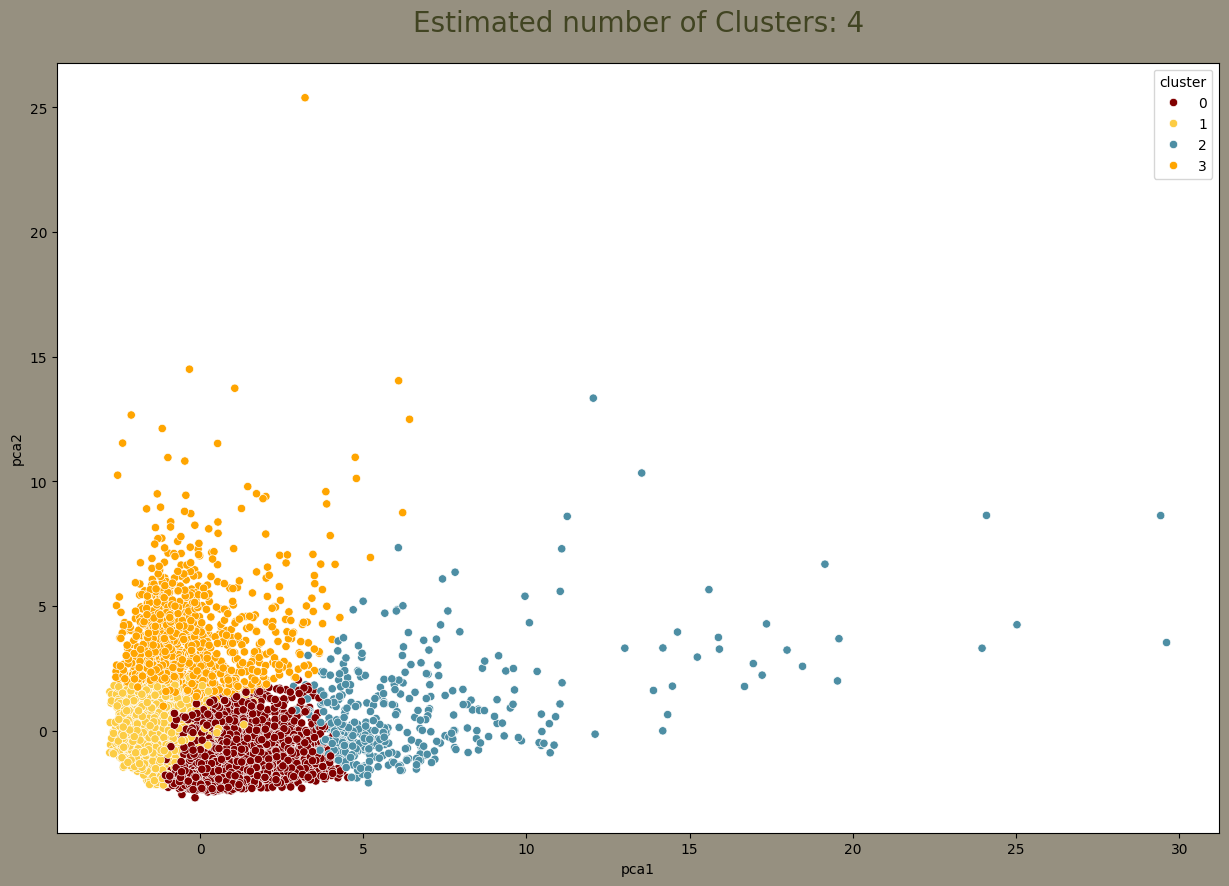

In [51]:
# Plot
plt.figure(figsize = (15,10), facecolor='#969080')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df,
                     palette = clus_clr)
                               
plt.title('Estimated number of Clusters: 4', fontsize = 20, color='#414422', y=1.03)
plt.show();

In [52]:
# Let's try the model with 4 clusters
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_ 

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])

# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])

y_kmeans = kmeans.fit_predict(df_scaled)

# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

pca_df

,pca1,pca2,cluster
0,-1.682220,-1.076455,5
1,-1.138285,2.506403,0
2,0.969678,-0.383481,4
3,-0.873626,0.043156,5
4,-1.599434,-0.688577,5
...,...,...,...
8945,-0.359633,-2.016119,2
8946,-0.564375,-1.639081,2
8947,-0.926207,-1.810759,2
8948,-2.336553,-0.657954,5


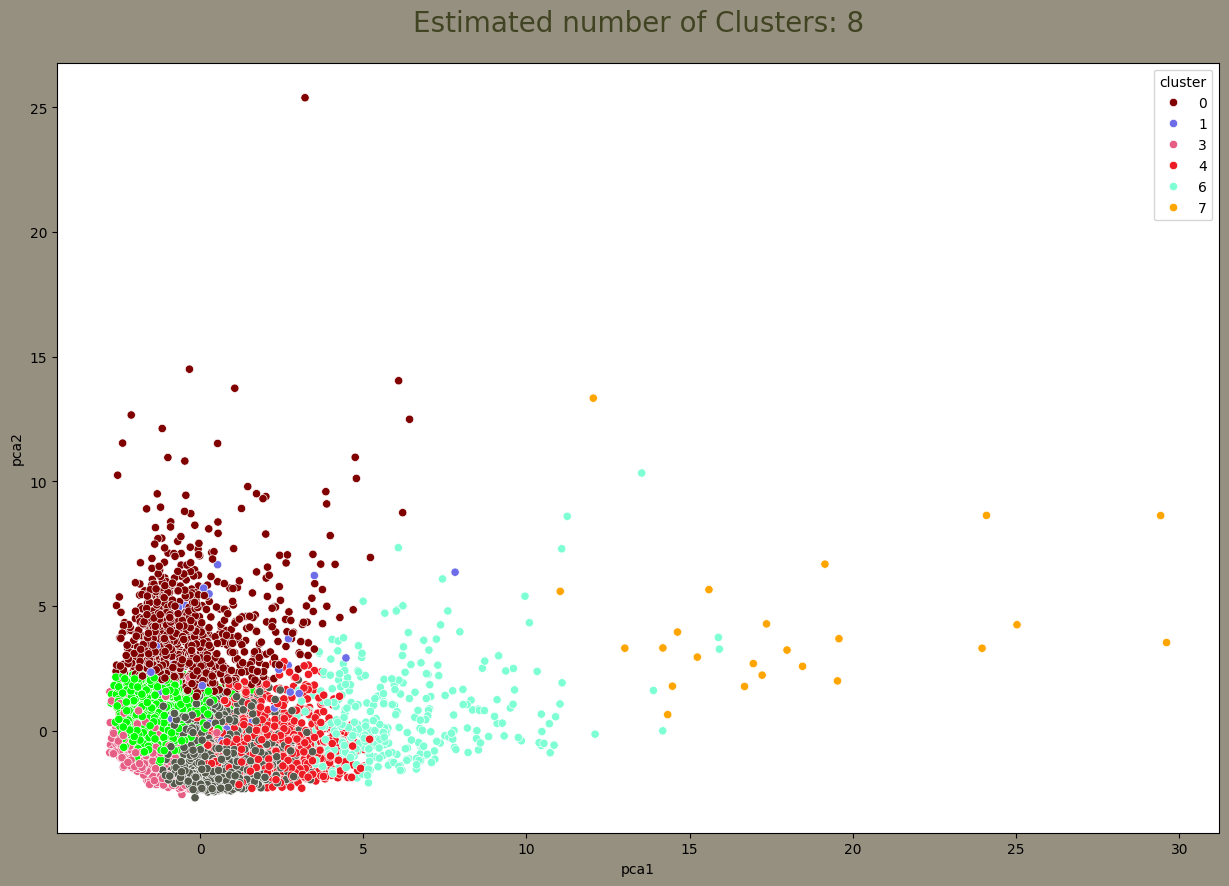

In [53]:
# Plot
plt.figure(figsize = (15,10), facecolor='#969080')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df,
                     palette = clus_clr)
                               
plt.title('Estimated number of Clusters: 8', fontsize = 20, color='#414422', y=1.03)
plt.show();